In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("knn/sna.csv")

In [4]:
data.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [5]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.25,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()

In [10]:
xtr=sc.fit_transform(xtr)

In [11]:
xte=sc.fit_transform(xte)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
classifier=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)

In [14]:
classifier.fit(xtr,ytr);

In [15]:
ypred=classifier.predict(xte)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
matrix=confusion_matrix(yte,ypred)

In [18]:
matrix

array([[64,  4],
       [ 3, 29]])

In [19]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


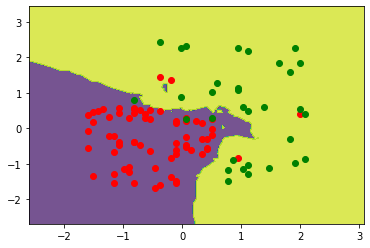

In [20]:
from matplotlib.colors import ListedColormap

X_set, y_set = xte, yte

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

In [23]:
X1.shape

(613, 569)

In [27]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).shape

(348797,)

In [25]:
pd.DataFrame(classifier.predict(np.array([X1.ravel(), X2.ravel()]).T))

,0
0,0
1,0
2,0
3,0
4,0
...,...
348792,1
348793,1
348794,1
348795,1


In [26]:
613*569

348797

In [30]:
X1.shape

(613, 569)

In [37]:
k=np.array([X1.ravel(), X2.ravel()]).T

In [38]:
k.shape

(348797, 2)

In [39]:
k

array([[-2.60035469, -2.68843113],
       [-2.59035469, -2.68843113],
       [-2.58035469, -2.68843113],
       ...,
       [ 3.05964531,  3.43156887],
       [ 3.06964531,  3.43156887],
       [ 3.07964531,  3.43156887]])

In [40]:
X1

array([[-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531],
       [-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531],
       [-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531],
       ...,
       [-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531],
       [-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531],
       [-2.60035469, -2.59035469, -2.58035469, ...,  3.05964531,
         3.06964531,  3.07964531]])

In [41]:
l=classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

In [42]:
l.shape

(613, 569)

In [43]:
l

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])